In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import time 
import re
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet,Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline , make_pipeline
# from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from sklearn.preprocessing import StandardScaler , OneHotEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer

In [290]:
df=pd.read_csv('final_map.csv')
df

,district_name,longitude,latitude,real_estate_area,real_estate_age,total_rooms,price,price_per_meter,floor,elevator,...,lobby,lobby_man,sauna,jacuzzi,gym,central_Vacuume_cleaner,janitor,Guard,master_room,conference_hall
0,پونک تهران,51.330387,35.767541,151.0,0.0,3.0,2.038900e+10,135026000.0,3.0,1,...,0,1,1,1,1,0,1,1,0,1
1,پونک تهران,51.330387,35.767541,80.0,16.0,2.0,7.800000e+09,97500000.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
2,پونک تهران,51.330387,35.767541,102.0,0.0,2.0,1.122000e+10,110000000.0,2.0,1,...,1,0,0,0,1,1,1,1,1,1
3,پونک تهران,51.330387,35.767541,115.0,0.0,2.0,1.150000e+10,100000000.0,2.0,1,...,1,1,0,0,1,1,0,1,0,1
4,پونک تهران,51.330387,35.767541,115.0,0.0,2.0,1.265000e+10,110000000.0,2.0,1,...,1,1,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103715,مرادآباد تهران,51.326001,35.785465,64.0,3.0,1.0,8.200000e+09,128125000.0,6.0,1,...,0,0,0,0,0,0,0,0,0,0
103716,مسگرآباد تهران,51.512479,35.626203,107.0,6.0,2.0,3.600000e+09,33645000.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
103717,قصر فیروزه ۲ تهران,51.503203,35.651683,72.0,3.0,2.0,1.550000e+09,21528000.0,6.0,1,...,0,0,0,0,0,0,0,1,0,0
103718,پامنار تهران,51.424649,35.681252,91.0,0.0,2.0,1.830000e+09,20110000.0,10.0,1,...,0,0,0,0,0,0,0,0,0,0


In [291]:
df =df.drop(columns=['price'],axis='columns')

In [292]:
# address=pd.get_dummies(df['district_name'])
# df_new=df.merge(address,left_index=True,right_index=True)
# df_new.drop(columns='district_name',axis='columns',inplace=True)
# df_new

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103720 entries, 0 to 103719
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   district_name            103720 non-null  object 
 1   longitude                103720 non-null  float64
 2   latitude                 103720 non-null  float64
 3   real_estate_area         103720 non-null  float64
 4   real_estate_age          103720 non-null  float64
 5   total_rooms              103720 non-null  float64
 6   price_per_meter          103720 non-null  float64
 7   floor                    103720 non-null  float64
 8   elevator                 103720 non-null  int64  
 9   parking                  103720 non-null  int64  
 10  warehouse                103720 non-null  int64  
 11  balcony                  103720 non-null  int64  
 12  pool                     103720 non-null  int64  
 13  roof_garden              103720 non-null  int64  
 14  lobb

In [294]:
over_100=pd.DataFrame((df['district_name'].value_counts()>60))
column_district_name=over_100[over_100['district_name']].index
df_filter=df[df['district_name'].isin(column_district_name)].copy()

In [295]:
columns_int64=df_filter.select_dtypes('int64').columns
for item in columns_int64:
    df_filter[item]=df_filter[item].astype('int8')

In [296]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99934 entries, 0 to 103443
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   district_name            99934 non-null  object 
 1   longitude                99934 non-null  float64
 2   latitude                 99934 non-null  float64
 3   real_estate_area         99934 non-null  float64
 4   real_estate_age          99934 non-null  float64
 5   total_rooms              99934 non-null  float64
 6   price_per_meter          99934 non-null  float64
 7   floor                    99934 non-null  float64
 8   elevator                 99934 non-null  int8   
 9   parking                  99934 non-null  int8   
 10  warehouse                99934 non-null  int8   
 11  balcony                  99934 non-null  int8   
 12  pool                     99934 non-null  int8   
 13  roof_garden              99934 non-null  int8   
 14  lobby                

In [297]:
integer_columns = df_filter.select_dtypes(include=['int8']).columns 
float_columns = df_filter.select_dtypes(include=['float64']).columns 

In [298]:
float_columns

Index(['longitude', 'latitude', 'real_estate_area', 'real_estate_age',
       'total_rooms', 'price_per_meter', 'floor'],
      dtype='object')

In [299]:
integer_columns

Index(['elevator', 'parking', 'warehouse', 'balcony', 'pool', 'roof_garden',
       'lobby', 'lobby_man', 'sauna', 'jacuzzi', 'gym',
       'central_Vacuume_cleaner', 'janitor', 'Guard', 'master_room',
       'conference_hall'],
      dtype='object')

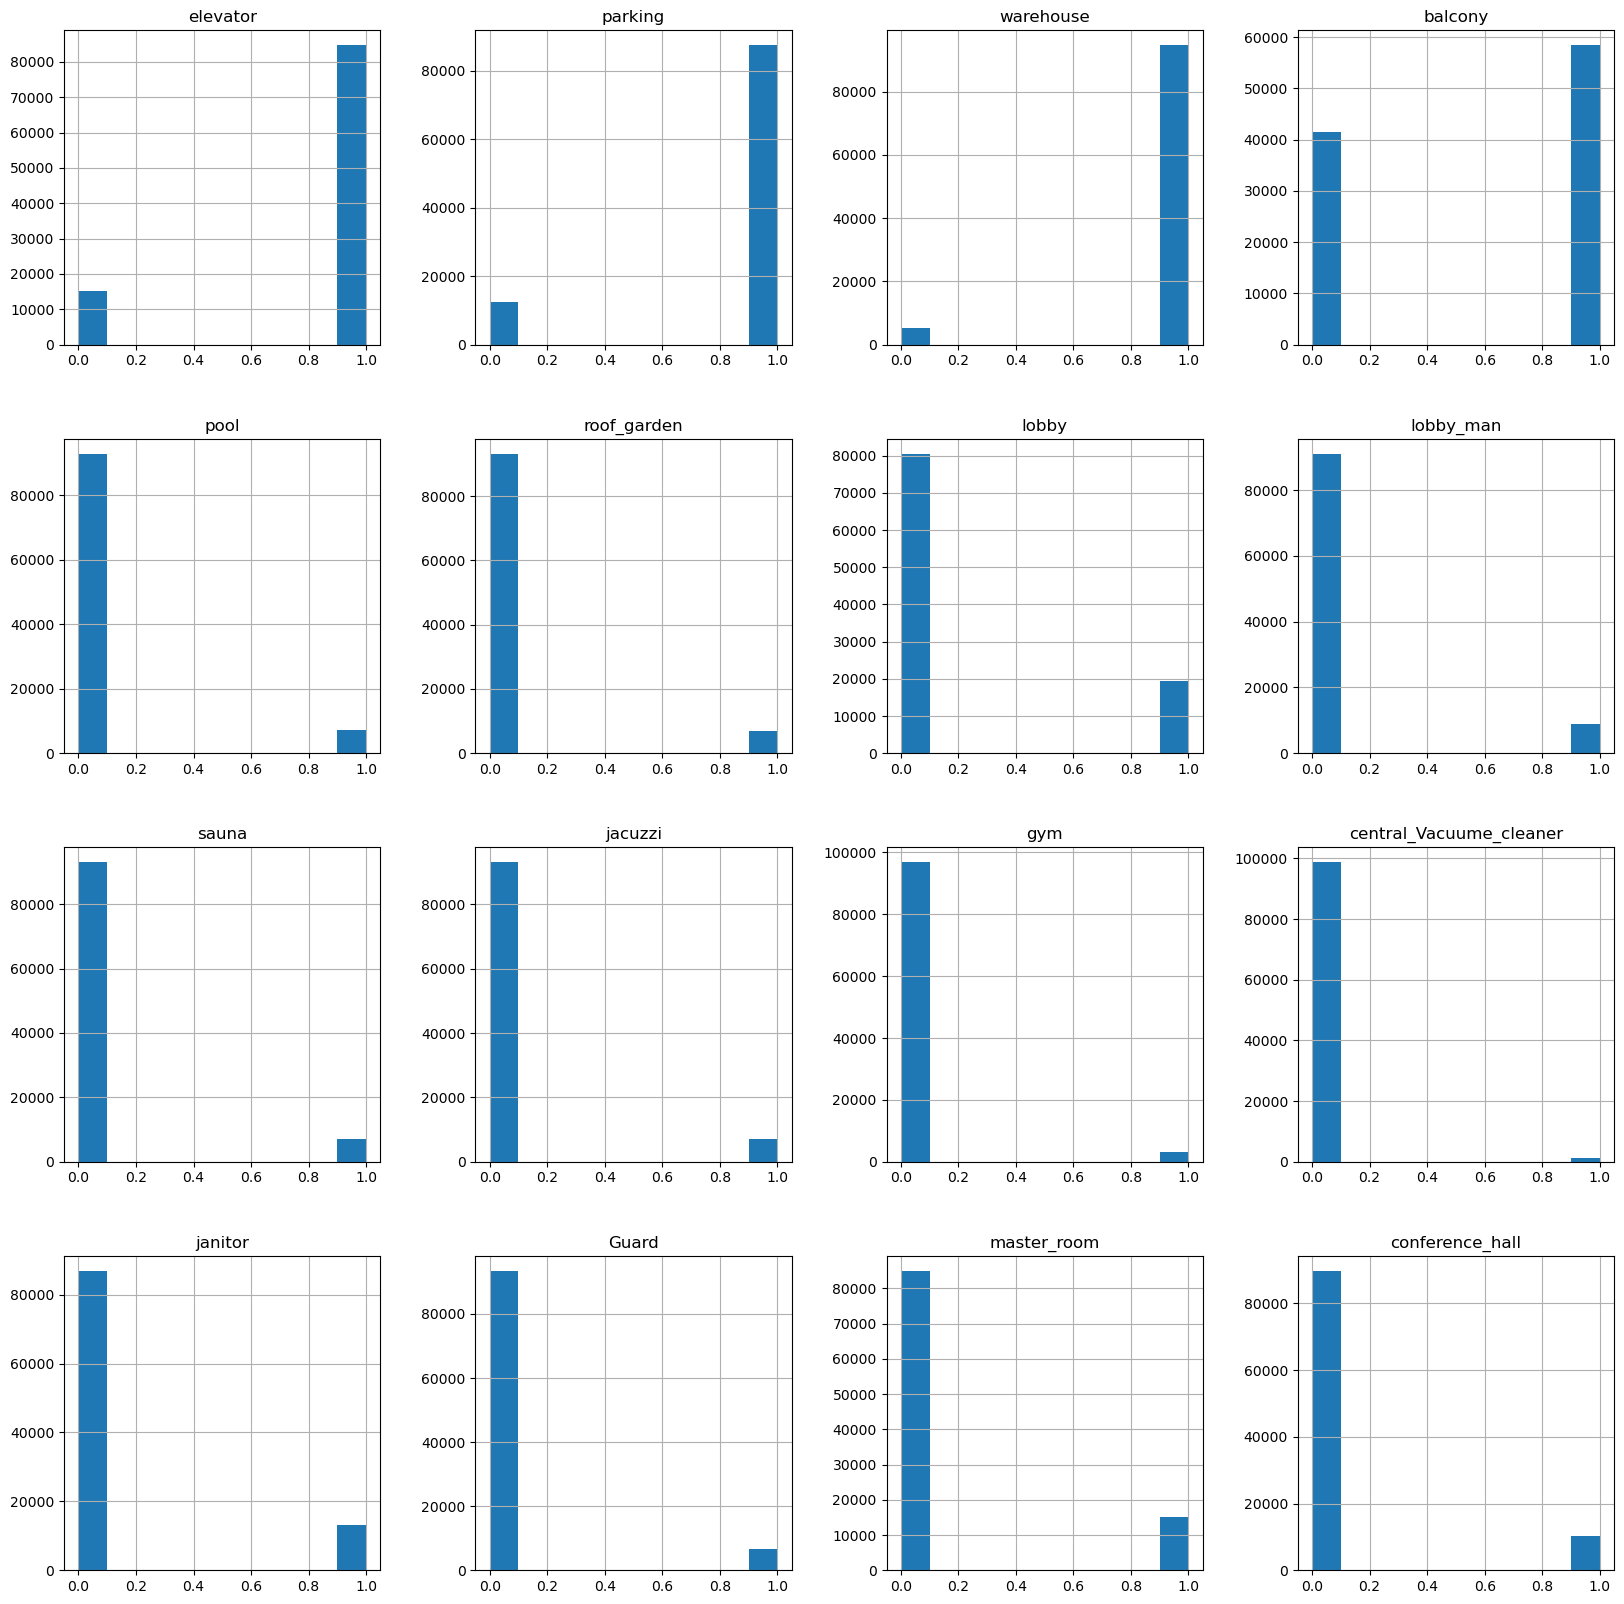

In [300]:
df_filter[integer_columns].hist(figsize=(20,20));

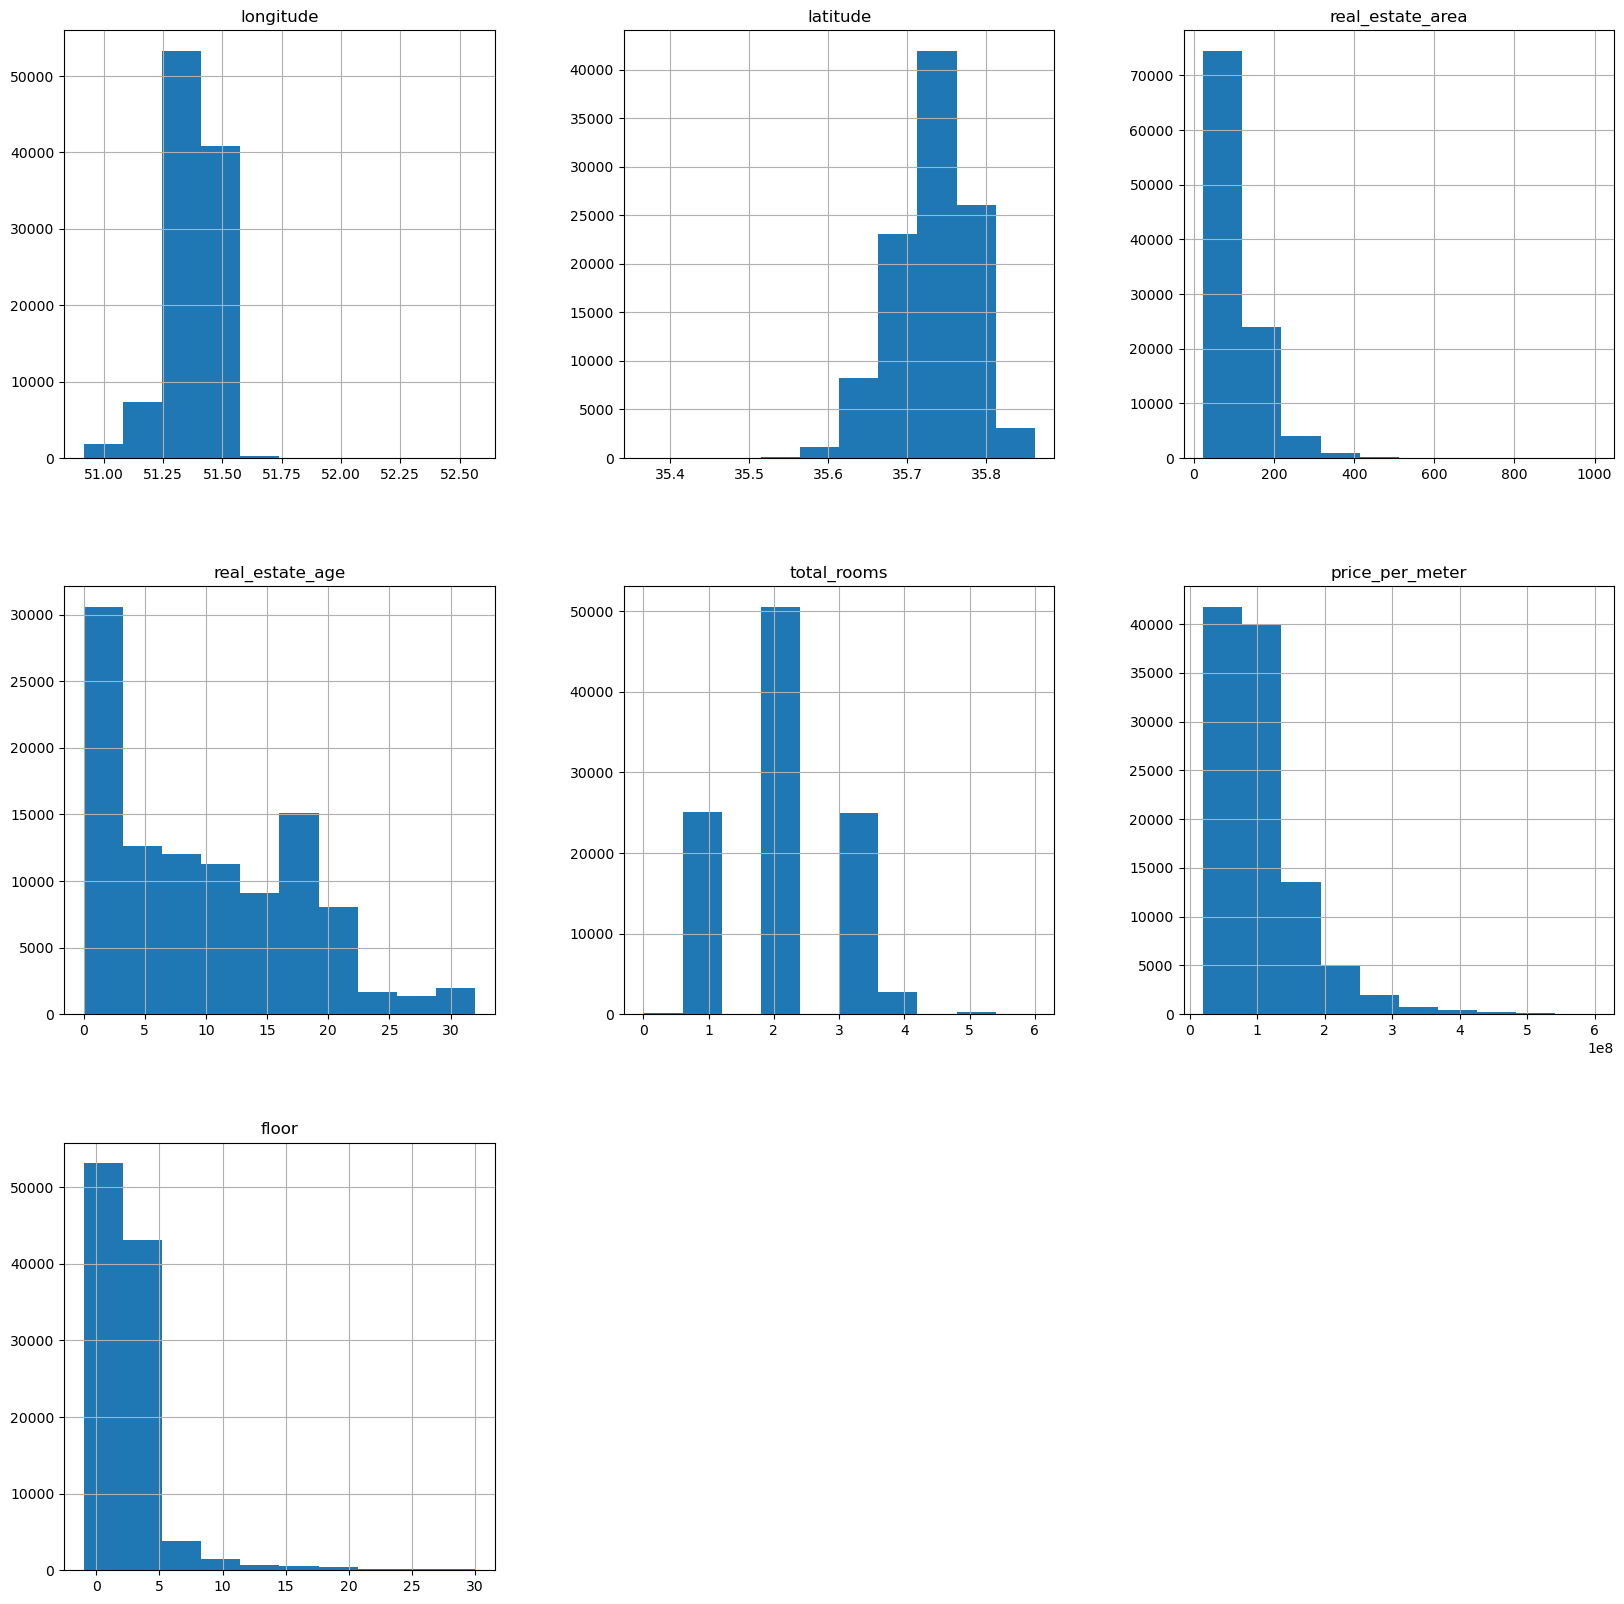

In [301]:
df[float_columns].hist(figsize=(20,20));

In [302]:
df_filter['real_estate_area'].value_counts()

60.0     2597
100.0    2578
110.0    2177
75.0     2172
70.0     2156
         ... 
844.0       1
409.0       1
449.0       1
358.0       1
752.0       1
Name: real_estate_area, Length: 486, dtype: int64

# Train

In [303]:

float_64_columns=['total_rooms','floor','real_estate_age','real_estate_area']
for item_64 in float_64_columns:
    df_filter[item_64]=df_filter[item_64].astype('int16')
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99934 entries, 0 to 103443
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   district_name            99934 non-null  object 
 1   longitude                99934 non-null  float64
 2   latitude                 99934 non-null  float64
 3   real_estate_area         99934 non-null  int16  
 4   real_estate_age          99934 non-null  int16  
 5   total_rooms              99934 non-null  int16  
 6   price_per_meter          99934 non-null  float64
 7   floor                    99934 non-null  int16  
 8   elevator                 99934 non-null  int8   
 9   parking                  99934 non-null  int8   
 10  warehouse                99934 non-null  int8   
 11  balcony                  99934 non-null  int8   
 12  pool                     99934 non-null  int8   
 13  roof_garden              99934 non-null  int8   
 14  lobby                

In [304]:
print(X_train.shape,X_test.shape)

(79390, 21) (19848, 21)


In [305]:
# address=pd.get_dummies(X_train['district_name'])
# X_train_dum=X_train.merge(address,left_index=True,right_index=True)
# X_train_dum.drop(columns='district_name',axis='columns',inplace=True)
# X_train_dum

In [306]:
# address_test=pd.get_dummies(X_test['district_name'])
# X_test_dum=X_test.merge(address_test,left_index=True,right_index=True)
# X_test_dum.drop(columns='district_name',axis='columns',inplace=True)
# X_test_dum

In [333]:
cat_attribs = ["district_name"]

cat_pipeline = make_pipeline(
      OneHotEncoder(handle_unknown="ignore")
)
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]
    
cluster_simil = ClusterSimilarity(n_clusters=20, gamma=1., random_state=42)

In [348]:
default_num_pipeline = make_pipeline(StandardScaler())
log_pipeline = make_pipeline(
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
default_num_pipeline = make_pipeline(StandardScaler())
preprocessing = ColumnTransformer([
        ("heavy_tail(araa,floor)", log_pipeline, ["real_estate_area"]),
        ("regular_scale", default_num_pipeline, ["real_estate_age", "total_rooms",'floor']),
        ("geo", cluster_simil, ["latitude", "longitude"]),
    

#         ("cat", cat_pipeline, ["district_name"])
    ],remainder='passthrough')

In [349]:
df_train, df_test= train_test_split(df_filter, test_size=0.2,stratify=df_filter['district_name'],random_state=42)

In [350]:
housing_prepared = preprocessing.fit_transform(df_train)
housing_prepared.shape

(79947, 42)

In [351]:
preprocessing.get_feature_names_out()

array(['heavy_tail(araa,floor)__real_estate_area',
       'regular_scale__real_estate_age', 'regular_scale__total_rooms',
       'regular_scale__floor', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'geo__Cluster 10 similarity',
       'geo__Cluster 11 similarity', 'geo__Cluster 12 similarity',
       'geo__Cluster 13 similarity', 'geo__Cluster 14 similarity',
       'geo__Cluster 15 similarity', 'geo__Cluster 16 similarity',
       'geo__Cluster 17 similarity', 'geo__Cluster 18 similarity',
       'geo__Cluster 19 similarity', 'remainder__district_name',
       'remainder__price_per_meter', 'remainder__elevator',
       'remainder__parking', 'remainder__warehouse', 'remainder__balcony',
       'remainder__pool'

In [352]:
df_filter.index.shape

(99934,)

In [353]:
df_housing_prepared = pd.DataFrame(housing_prepared,
                                       columns=preprocessing.get_feature_names_out(),index=df_train.index) 
df_housing_prepared

,"heavy_tail(araa,floor)__real_estate_area",regular_scale__real_estate_age,regular_scale__total_rooms,regular_scale__floor,geo__Cluster 0 similarity,geo__Cluster 1 similarity,geo__Cluster 2 similarity,geo__Cluster 3 similarity,geo__Cluster 4 similarity,geo__Cluster 5 similarity,...,remainder__lobby,remainder__lobby_man,remainder__sauna,remainder__jacuzzi,remainder__gym,remainder__central_Vacuume_cleaner,remainder__janitor,remainder__Guard,remainder__master_room,remainder__conference_hall
3684,0.508087,-0.966677,1.1959,-0.016418,0.986023,0.999276,0.966651,0.987707,0.851741,0.995055,...,1,0,1,1,0,0,0,0,0,0
19976,0.839899,-0.966677,1.1959,0.348082,0.974356,0.998523,0.975926,0.986502,0.826408,0.99988,...,1,0,0,0,0,0,1,0,0,0
86362,-0.785289,0.044574,-1.35867,-0.745417,0.999477,0.976736,0.973476,0.993505,0.932477,0.971271,...,0,0,0,0,0,0,0,0,0,0
20465,0.592079,-1.219489,-0.081385,-0.380918,0.974356,0.998523,0.975926,0.986502,0.826408,0.99988,...,1,0,0,0,0,0,0,0,1,0
35795,1.50703,2.319886,1.1959,-0.016418,0.993708,0.996128,0.980281,0.996594,0.880429,0.993671,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97850,1.099999,-1.219489,1.1959,-0.745417,0.984941,0.999678,0.975272,0.991044,0.850361,0.998084,...,1,0,0,0,0,0,1,0,1,1
35483,0.825255,-0.84027,1.1959,-0.745417,0.993708,0.996128,0.980281,0.996594,0.880429,0.993671,...,1,0,0,0,0,0,0,0,0,0
22861,-0.952659,1.687855,-1.35867,-0.745417,0.992941,0.986483,0.991914,0.999983,0.900073,0.987429,...,0,0,0,0,0,0,0,0,0,0
47156,-0.083825,2.19348,-1.35867,-0.745417,0.99809,0.989206,0.981355,0.99804,0.905551,0.986009,...,0,0,0,0,0,0,0,0,0,0


In [359]:
X_train = df_train.drop(['price_per_meter','district_name'], axis=1)
y_train = df_train['price_per_meter']

In [360]:
X_train

,longitude,latitude,real_estate_area,real_estate_age,total_rooms,floor,elevator,parking,warehouse,balcony,...,lobby,lobby_man,sauna,jacuzzi,gym,central_Vacuume_cleaner,janitor,Guard,master_room,conference_hall
3684,51.401393,35.806665,120,2,3,3,1,1,1,1,...,1,0,1,1,0,0,0,0,0,0
19976,51.456687,35.772735,141,2,3,4,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
86362,51.288112,35.729082,64,10,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
20465,51.456687,35.772735,125,0,2,2,1,1,1,1,...,1,0,0,0,0,0,0,0,1,0
35795,51.376042,35.759061,195,28,3,3,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97850,51.416330,35.781065,160,0,3,1,1,1,1,1,...,1,0,0,0,0,0,1,0,1,1
35483,51.376042,35.759061,140,3,3,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
22861,51.363130,35.697901,59,23,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
47156,51.339280,35.738556,90,27,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [361]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('heavy_tail(araa,floor)',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['real_estate_area']),
                                                 ('regular_scale',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['real_estate_age',
                                                   'total_rooms', 'floor']),
                                                 ('geo',
                                                  ClusterSimilarity(n_clusters=20,
                                                                    random_state=42),
                                                  ['latitude', 'longitude'])])),
                ('linearregression', LinearRegression())])

In [362]:
from sklearn.model_selection import cross_val_score

lrg_rmses = -cross_val_score(lin_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lrg_rmses).describe()

count    1.000000e+01
mean     3.753188e+07
std      6.486046e+05
min      3.662377e+07
25%      3.713655e+07
50%      3.752848e+07
75%      3.772534e+07
max      3.893113e+07
dtype: float64

In [363]:
X_test = df_test.drop(["price_per_meter",'district_name'], axis=1)
y_test = df_test["price_per_meter"].copy()

In [364]:
y_predict = lin_reg.predict(X_test)

In [365]:
mean_absolute_error(y_test,y_predict)

24998279.41518242

In [366]:
xgb=make_pipeline(preprocessing,XGBRegressor(colsample_bylevel= 0.916383388959536,colsample_bytree= 0.5431902479138185,learning_rate=0.011541413772928215,max_depth=6,min_child_weight= 1, n_estimators= 458 ,reg_alpha= 0.37531887108587414,reg_lambda= 0.20365680474275544,subsample= 0.5728525097374817))


In [367]:
xgb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('heavy_tail(araa,floor)',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['real_estate_area']),
                                                 ('regular_scale',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardSc...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.011541413772928215, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=6, max_leaves=None,
                              min_child_weight=1, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=458, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [368]:
mean_absolute_error(y_test,xgb.predict(X_test)) , mean_squared_error(y_test,xgb.predict(X_test),squared=False)

(16413383.720118077, 27700639.90609392)

In [369]:

regressor = XGBRegressor()

param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'n_estimators': (100, 1000),
    'subsample': (0.5, 1.0, 'uniform'),
    'colsample_bytree': (0.5, 1.0, 'uniform'),
    'colsample_bylevel': (0.5, 1.0, 'uniform'),
    'reg_lambda': (0.0, 1.0, 'uniform'),
    'reg_alpha': (0.0, 1.0, 'uniform'),
    'min_child_weight': (1, 10)
}

In [370]:
opt_xgb=make_pipeline(preprocessing,BayesSearchCV(regressor, param_space, n_iter=1, scoring='neg_mean_squared_error', cv=5))
# opt = BayesSearchCV(regressor, param_space, n_iter=1, scoring='neg_mean_squared_error', cv=5)


In [371]:
opt_xgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('heavy_tail(araa,floor)',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['real_estate_area']),
                                                 ('regular_scale',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardSc...
                                                      random_state=None, ...),
                               n_iter=1, scoring='neg_mean_squared_error',
                               search_spaces={'colsample_bylevel': (0.5, 1.0,
                                                                    'uniform'),
                                              'colsample_bytree': (0.5, 1.0,
                                                                   'uniform'),
                                              'learning_rate': (0.01, 0.3,
                                                                'log-uniform'),
                                              'max_depth': (3, 10),
                                              'min_child_weight': (1, 10),
                                              'n_estimators': (100, 1000),
                                              'reg_alpha': (0.0, 1.0,
                                                            'uniform'),
                                              'reg_lambda': (0.0, 1.0,
                                                             'uniform'),
                                              'subsample': (0.5, 1.0,
                                                            'uniform')}))])

In [372]:
mean_absolute_error(y_test,opt_xgb.predict(X_test)) , mean_squared_error(y_test,opt_xgb.predict(X_test),squared=False)

(14901632.087807074, 26578849.982178144)

In [387]:
from lightgbm import LGBMRegressor

In [377]:
# lgb_train = lgb.Dataset(X_train, label=y_train)
# lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

In [378]:
params = {
    'metric': {'l2','l1'},
    'boosting': 'gbdt',
    'num_leaves': 10,
    'task': 'train',
    'learnnig_rage': 0.05,
    'verbose': -1
}

In [ ]:
# model = lgb.train(params,
#                  lgb_train,
#                  valid_sets=lgb_eval,
#                 num_boost_round=5000,
#                 callbacks=[lgb.early_stopping(stopping_rounds=50)])

In [405]:
light=make_pipeline(preprocessing,LGBMRegressor(
    boosting_type='gbdt',
    num_leaves= 10,
    learnnig_rate= 0.05,n_estimators= 100))

In [406]:
light.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: learnnig_rate
[LightGBM] [Warning] Unknown parameter: learnnig_rate
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023765 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4654
[LightGBM] [Info] Number of data points in the train set: 79947, number of used features: 40
[LightGBM] [Info] Start training from score 104172979.592580


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('heavy_tail(araa,floor)',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['real_estate_area']),
                                                 ('regular_scale',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['real_estate_age',
                                                   'total_rooms', 'floor']),
                                                 ('geo',
                                                  ClusterSimilarity(n_clusters=20,
                                                                    random_state=42),
                                                  ['latitude', 'longitude'])])),
                ('lgbmregressor',
                 LGBMRegressor(learnnig_rate=0.05, num_leaves=10))])

In [402]:
mean_absolute_error(y_test,light.predict(X_test)) , mean_squared_error(y_test,light.predict(X_test),squared=False)

[LightGBM] [Warning] Unknown parameter: learnnig_rate
[LightGBM] [Warning] Unknown parameter: learnnig_rate


(17453351.583624803, 28902499.03994463)

In [407]:
from sklearn.neighbors import KNeighborsRegressor

In [422]:
knnreg=KNeighborsRegressor()
param_space = {
    'n_neighbors': (1, 10),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': (10, 50),
    'p': (1, 2)
}

In [423]:
knn=make_pipeline(preprocessing,BayesSearchCV(knnreg, param_space, n_iter=1, scoring='neg_mean_squared_error', cv=5))

In [424]:
knn.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('heavy_tail(araa,floor)',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['real_estate_area']),
                                                 ('regular_scale',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardSc...
                                                   'total_rooms', 'floor']),
                                                 ('geo',
                                                  ClusterSimilarity(n_clusters=20,
                                                                    random_state=42),
                                                  ['latitude', 'longitude'])])),
                ('bayessearchcv',
                 BayesSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=1,
                               scoring='neg_mean_squared_error',
                               search_spaces={'algorithm': ['auto', 'ball_tree',
                                                            'kd_tree',
                                                            'brute'],
                                              'leaf_size': (10, 50),
                                              'n_neighbors': (1, 10),
                                              'p': (1, 2),
                                              'weights': ['uniform',
                                                          'distance']}))])

In [425]:
mean_absolute_error(y_test,knn.predict(X_test)) , mean_squared_error(y_test,knn.predict(X_test),squared=False)

(22415411.990810435, 37409829.3342225)

In [330]:
rfc = make_pipeline(preprocessing,RandomForestRegressor(n_estimators =  500, min_samples_split= 5, min_samples_leaf= 4, max_features =  0.7, max_depth= 10, bootstrap = False))

In [331]:
rfc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('heavy_tail(araa,floor)',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['real_estate_area']),
                                                 ('regular_scale',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['real_estate_age',
                                                   'total_rooms', 'floor']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude'])])),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, max_depth=10,
                                       max_features=0.7, min_samples_leaf=4,
                                       min_samples_split=5,
                                       n_estimators=500))])

In [332]:
mean_absolute_error(y_test,rfc.predict(X_test)) , mean_squared_error(y_test,rfc.predict(X_test),squared=False)

(16724600.105036097, 28730264.483358238)

In [411]:
from catboost import CatBoostRegressor


In [415]:
catboost = CatBoostRegressor()

param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'depth': (3, 10),
    'n_estimators': (100, 1000),
    'l2_leaf_reg': (1, 10),
    'subsample': (0.5, 1.0, 'uniform'),
    'colsample_bylevel': (0.5, 1.0, 'uniform'),
    'min_child_samples': (1, 20),
    'border_count': (1, 255)
}

In [419]:
cat_b=make_pipeline(preprocessing,BayesSearchCV(catboost, param_space, n_iter=5, scoring='neg_mean_squared_error', cv=5))

In [420]:
cat_b.fit(X_train,y_train)

0:	learn: 62825511.5077929	total: 19.7ms	remaining: 18.9s
1:	learn: 61304508.8241683	total: 39.4ms	remaining: 18.9s
2:	learn: 59821433.6947804	total: 60ms	remaining: 19.2s
3:	learn: 58421059.7942261	total: 76.7ms	remaining: 18.3s
4:	learn: 57047077.9430102	total: 93ms	remaining: 17.8s
5:	learn: 55790601.1619497	total: 108ms	remaining: 17.2s
6:	learn: 54582397.6030810	total: 122ms	remaining: 16.7s
7:	learn: 53415264.8676608	total: 137ms	remaining: 16.3s
8:	learn: 52318007.1824934	total: 150ms	remaining: 15.9s
9:	learn: 51233216.4478189	total: 163ms	remaining: 15.5s
10:	learn: 50232091.8309554	total: 177ms	remaining: 15.2s
11:	learn: 49259038.9886387	total: 190ms	remaining: 15s
12:	learn: 48328021.2078798	total: 202ms	remaining: 14.8s
13:	learn: 47440440.9672686	total: 213ms	remaining: 14.4s
14:	learn: 46602654.9321470	total: 225ms	remaining: 14.2s
15:	learn: 45795602.3237705	total: 234ms	remaining: 13.8s
16:	learn: 45042655.3249384	total: 244ms	remaining: 13.6s
17:	learn: 44300000.36793

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('heavy_tail(araa,floor)',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['real_estate_area']),
                                                 ('regular_scale',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardSc...
                               estimator=<catboost.core.CatBoostRegressor object at 0x000001B20D646580>,
                               n_iter=5, scoring='neg_mean_squared_error',
                               search_spaces={'border_count': (1, 255),
                                              'colsample_bylevel': (0.5, 1.0,
                                                                    'uniform'),
                                              'depth': (3, 10),
                                              'l2_leaf_reg': (1, 10),
                                              'learning_rate': (0.01, 0.3,
                                                                'log-uniform'),
                                              'min_child_samples': (1, 20),
                                              'n_estimators': (100, 1000),
                                              'subsample': (0.5, 1.0,
                                                            'uniform')}))])

In [430]:
mean_absolute_error(y_test,cat_b.predict(X_test)) , mean_squared_error(y_test,cat_b.predict(X_test),squared=False)

(14548777.335134214, 26110830.884958487)

In [433]:
cat_b.set_output

<bound method Pipeline.set_output of Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('heavy_tail(araa,floor)',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['real_estate_area']),
                                                 ('regular_scale',
                                                  Pipeline(steps=[('standardscaler',
                                                                   Standa

In [434]:
# print("Best hyperparameters: ", opt.best_params_)
# print("Best score: ", -opt.best_score_)

In [435]:
# y_pred = opt.predict(X_test_dum)
# mse = mean_squared_error(y_test, y_pred,squared=False)
# print("Mean Squared Error on test set: ", mse)
